# Введение в Keras
---

<font size =4 face = 'Calibri'>

### Table of content

* [1. Установка Keras](#1.-Установка-Keras)
* [2. Последовательная модель Keras](#2.-Последовательная-модель-Keras)
    * [2.2 Тренировка модели](#2.2-Тренировка-модели)
    * [2.3 Предсказание при помощи модели](#2.3-Предсказание-при-помощи-модели)
    * [2.4 Упражнения](#2.4-Упражнения)
* [3.  Исследование Автоэнкодреа](#3.-Исследование-автоэнкодера-в-Keras)
    * [3.1 Принцип работы Автоэнкодреа](#3.1-Принцип-работы-Автоэнкодреа)
    * [3.2 Обучение авоэнкодера](#3.2-Обучение-авоэнкодера)
    * [3.3 Упражнения](#3.3-Упражнения)  
* [4. Генеративно - состязательные сети (GAN)](#4.-Генеративно-состязательные-сети-(Generative-Adversarial-Network,-GAN))
    * [4.1 Основы работы GAN](#4.1-Основы-работы-GAN)
    * [4.2 Создание ГАН (генератора и дискреминатора) ](#4.2-Создание-ГАН-(генератора-и-дискреминатора))
    * [4.3 Тренировка GAN](#4.3-Тренировка-GAN)
    * [4.4 Упражнения](#4.4-Упражнения)
    
    

- - -
<font size =3>

# 1. Установка Keras
- - -


[Go to content](#Table-of-content)

<font size=4 face = 'Calibri' >  

Керас - это высоко-уровневые API с беэкэндом Tensorflow и Tehan для разработки нейронных сетей

<font size=4.5 face = 'Calibri' >  

Для прохождения данной лабораторной работы необходимо выполнитнить один из двух вариантов

<font size=4.5 face = 'Calibri' >  
 1. установить библиотеки tensorflow версии 1.х и библиотеку Keras
 
<font size=4.5 face = 'Calibri' >   
 2. запустить эту лабораторную работу в [Google CoLab](https://colab.research.google.com/) (рекомендуется)
 

<font size=4 face = 'Calibri' >   информацию по установке  tensorflow также можно найти, например тут https://techz.io/anaconda-install-tensorflow/

<font size=4 face = 'Calibri' >  
справка по Keras [Keras cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf)

<font size =3 font-family= 'Linux Libertine O'>
    
    
в данном репозиторие можно найти большое количество примеров

https://github.com/leriomaggio/deep-learning-keras-tensorflow

также можно найти их [тут](https://keras.io/getting-started/sequential-model-guide/)

In [ ]:
!pip isntall keras

 *******
# 2. Последовательная модель Keras 
 *******

[Go to content](#Table-of-content)

In [21]:
import keras

AttributeError: module 'keras.backend.tensorflow_backend' has no attribute '_is_tf_1'

<font size=4 face = 'Calibri' style='Line-height : 1.5em'>  
    
Sequential() это самая простая модель в Keras, является последовательной моделью, в которй автоматически все последующие слои связаны с предыдущими. 





> **!**При этом вручную можно изменить модель и например сделать слои ResNET.





In [2]:
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'tf'

<font size=6 face = 'Calibri' style='Line-height : 1.5em'>  
Загрузка данных
    

(1340, 2) (1340,)


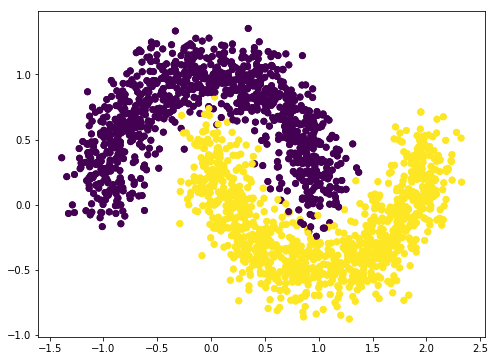

In [57]:
import sklearn
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X,Y = make_moons(n_samples=2000, noise=0.15)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.33, random_state=42)


print(X_train.shape, Y_train.shape)

plt.figure(figsize=(8,6))

plt.scatter(X[:,0],X[:,1], c=Y)

plt.scatter(X[:, 0], X[:, 1], c=Y)

plt.show()


<font size=4 face = 'Calibri' style='Line-height : 1.5em'>  

Описание сети - мы будем использовать простую полносвязную `Dense` сеть
сеть состоит из 3 слоев 1 входной, 1 внутренний и 1 выходной

In [5]:
def model_init(X_train):
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

слой dense имеет следующую структуру 
```python 
Dense([units - output dimention, 
       activation - activation function, 
       input_dim - inputs dimention])
```

<font size=4 face = 'Calibri' style='Line-height : 1.5em'>  
    
в модели один выход, принимающий значения между 1 и 0 (бинарная классификация). 



<font size=4 face = 'Calibri' style='Line-height : 1.5em'>  
    
следующая процедура позволяет посмотреть как выглядит модель

In [1]:
model.summary()

NameError: name 'model' is not defined

## 2.2 Тренировка модели

<font size =3>

**!** теперь можно потренировать модель

<font size =3>       
* EPOCHS     - число эпох тренировки

<font size =3>     
* BATCH_SIZE - размер пакета (батча) для итерации

<font size =3>     
* LR         - скорость обучения

In [28]:
EPOCHS     = 300
BATCH_SIZE = 10
LR         = 1e-3       

<font size =4>  выбор метода градиентного спуска

In [4]:
from keras.optimizers import adam 

<font size=4 face = 'Calibri' style='Line-height : 1.5em'>  
инициализация моедли,
выбираем метод:
* метод граидентного спуска  (optimizer)
* функцию потерь (loss)
* метрику оценки качества сети (metrics) 

In [30]:
model = model_init(X_train)
# Compile model
model.compile(loss='binary_crossentropy', optimizer=adam(lr=LR), metrics=['accuracy'])
print('compiled')

compiled


<font size =4>  процедура тренировки

In [31]:
# Fit the model
result = model.fit(X_train, 
                   Y_train, 
                   epochs=EPOCHS, 
                   batch_size=BATCH_SIZE,
                   verbose=1,
                   validation_data = (X_test, Y_test) )
print('data fit to model')

Train on 1340 samples, validate on 660 samples
Epoch 1/300
1340/1340 [==============================] - 1s 968us/step - loss: 0.6728 - acc: 0.6224 - val_loss: 0.5554 - val_acc: 0.8667
Epoch 2/300
1340/1340 [==============================] - 0s 287us/step - loss: 0.4918 - acc: 0.8575 - val_loss: 0.4104 - val_acc: 0.8803
Epoch 3/300
1340/1340 [==============================] - 0s 283us/step - loss: 0.3692 - acc: 0.8612 - val_loss: 0.3201 - val_acc: 0.8818
Epoch 4/300
1340/1340 [==============================] - 0s 277us/step - loss: 0.3125 - acc: 0.8679 - val_loss: 0.2858 - val_acc: 0.8879
Epoch 5/300
1340/1340 [==============================] - 0s 199us/step - loss: 0.2895 - acc: 0.8746 - val_loss: 0.2703 - val_acc: 0.8909
Epoch 6/300
1340/1340 [==============================] - 0s 278us/step - loss: 0.2759 - acc: 0.8799 - val_loss: 0.2571 - val_acc: 0.8924
Epoch 7/300
1340/1340 [==============================] - 0s 302us/step - loss: 0.2652 - acc: 0.8828 - val_loss: 0.2462 - val_acc: 0

1340/1340 [==============================] - 0s 284us/step - loss: 0.0302 - acc: 0.9918 - val_loss: 0.0252 - val_acc: 0.9924
Epoch 61/300
1340/1340 [==============================] - 0s 199us/step - loss: 0.0304 - acc: 0.9933 - val_loss: 0.0212 - val_acc: 0.9939
Epoch 62/300
1340/1340 [==============================] - 0s 266us/step - loss: 0.0291 - acc: 0.9925 - val_loss: 0.0202 - val_acc: 0.9924
Epoch 63/300
1340/1340 [==============================] - 0s 185us/step - loss: 0.0291 - acc: 0.9925 - val_loss: 0.0207 - val_acc: 0.9924
Epoch 64/300
1340/1340 [==============================] - 0s 210us/step - loss: 0.0290 - acc: 0.9925 - val_loss: 0.0212 - val_acc: 0.9924
Epoch 65/300
1340/1340 [==============================] - 0s 204us/step - loss: 0.0288 - acc: 0.9918 - val_loss: 0.0194 - val_acc: 0.9924
Epoch 66/300
1340/1340 [==============================] - 0s 222us/step - loss: 0.0284 - acc: 0.9910 - val_loss: 0.0201 - val_acc: 0.9924
Epoch 67/300
1340/1340 [=======================

1340/1340 [==============================] - 0s 223us/step - loss: 0.0236 - acc: 0.9918 - val_loss: 0.0169 - val_acc: 0.9909
Epoch 120/300
1340/1340 [==============================] - 0s 196us/step - loss: 0.0231 - acc: 0.9918 - val_loss: 0.0176 - val_acc: 0.9909
Epoch 121/300
1340/1340 [==============================] - 0s 188us/step - loss: 0.0227 - acc: 0.9925 - val_loss: 0.0185 - val_acc: 0.9909
Epoch 122/300
1340/1340 [==============================] - 0s 202us/step - loss: 0.0236 - acc: 0.9925 - val_loss: 0.0169 - val_acc: 0.9924
Epoch 123/300
1340/1340 [==============================] - 0s 204us/step - loss: 0.0232 - acc: 0.9910 - val_loss: 0.0152 - val_acc: 0.9939
Epoch 124/300
1340/1340 [==============================] - 0s 195us/step - loss: 0.0232 - acc: 0.9925 - val_loss: 0.0165 - val_acc: 0.9924
Epoch 125/300
1340/1340 [==============================] - 0s 210us/step - loss: 0.0230 - acc: 0.9918 - val_loss: 0.0164 - val_acc: 0.9939
Epoch 126/300
1340/1340 [================

1340/1340 [==============================] - 0s 207us/step - loss: 0.0206 - acc: 0.9918 - val_loss: 0.0191 - val_acc: 0.9909
Epoch 179/300
1340/1340 [==============================] - 0s 181us/step - loss: 0.0212 - acc: 0.9940 - val_loss: 0.0160 - val_acc: 0.9924
Epoch 180/300
1340/1340 [==============================] - 0s 190us/step - loss: 0.0212 - acc: 0.9925 - val_loss: 0.0164 - val_acc: 0.9939
Epoch 181/300
1340/1340 [==============================] - 0s 184us/step - loss: 0.0208 - acc: 0.9910 - val_loss: 0.0160 - val_acc: 0.9939
Epoch 182/300
1340/1340 [==============================] - 0s 190us/step - loss: 0.0218 - acc: 0.9925 - val_loss: 0.0162 - val_acc: 0.9909
Epoch 183/300
1340/1340 [==============================] - 0s 170us/step - loss: 0.0214 - acc: 0.9918 - val_loss: 0.0167 - val_acc: 0.9909
Epoch 184/300
1340/1340 [==============================] - 0s 196us/step - loss: 0.0209 - acc: 0.9918 - val_loss: 0.0158 - val_acc: 0.9909
Epoch 185/300
1340/1340 [================

1340/1340 [==============================] - 0s 203us/step - loss: 0.0202 - acc: 0.9933 - val_loss: 0.0162 - val_acc: 0.9955
Epoch 238/300
1340/1340 [==============================] - 0s 194us/step - loss: 0.0202 - acc: 0.9910 - val_loss: 0.0181 - val_acc: 0.9909
Epoch 239/300
1340/1340 [==============================] - 0s 199us/step - loss: 0.0203 - acc: 0.9925 - val_loss: 0.0181 - val_acc: 0.9909
Epoch 240/300
1340/1340 [==============================] - 0s 196us/step - loss: 0.0208 - acc: 0.9933 - val_loss: 0.0159 - val_acc: 0.9939
Epoch 241/300
1340/1340 [==============================] - 0s 187us/step - loss: 0.0202 - acc: 0.9933 - val_loss: 0.0149 - val_acc: 0.9939
Epoch 242/300
1340/1340 [==============================] - 0s 199us/step - loss: 0.0225 - acc: 0.9918 - val_loss: 0.0177 - val_acc: 0.9924
Epoch 243/300
1340/1340 [==============================] - 0s 202us/step - loss: 0.0210 - acc: 0.9925 - val_loss: 0.0187 - val_acc: 0.9909
Epoch 244/300
1340/1340 [================

Epoch 296/300
1340/1340 [==============================] - 0s 193us/step - loss: 0.0207 - acc: 0.9918 - val_loss: 0.0183 - val_acc: 0.9909
Epoch 297/300
1340/1340 [==============================] - 0s 167us/step - loss: 0.0203 - acc: 0.9918 - val_loss: 0.0200 - val_acc: 0.9909
Epoch 298/300
1340/1340 [==============================] - 0s 186us/step - loss: 0.0204 - acc: 0.9925 - val_loss: 0.0181 - val_acc: 0.9924
Epoch 299/300
1340/1340 [==============================] - 0s 183us/step - loss: 0.0203 - acc: 0.9933 - val_loss: 0.0181 - val_acc: 0.9924
Epoch 300/300
1340/1340 [==============================] - 0s 189us/step - loss: 0.0208 - acc: 0.9925 - val_loss: 0.0192 - val_acc: 0.9909
data fit to model


<font size=4 face = 'Calibri' style='Line-height : 1.5em'> 
    
**ПО окончанию тренировки можно оценить точность следующим кодом.**



In [32]:
# evaluate the model
scores = model.evaluate(X_test,Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

660/660 [==============================] - 0s 38us/step

acc: 99.09%


<font size=4.5 face = 'Calibri' style='Line-height : 1.5em'> 

А также можно посмотреть процесс обучения на графике, например можно посмотреть потери и метрику точность  


Все, что вы хотели бы посмотреть надо прописывать в коде тренировке

In [33]:
import numpy as np
print(np.mean(result.history["acc"][-1:-10:-1]))
print((result.history["loss"][-1]))
print(np.mean(result.history["val_acc"][-1:-10:-1]))
print((result.history["val_loss"][-1]))

0.9922885554742259
0.020764750667348748
0.991919189992577
0.019202608995383896


In [34]:
def plot_history(network_history, fp = 0, lp = -1):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'][fp:lp])
    plt.plot(network_history.history['val_loss'][fp:lp])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'][fp:lp])
    plt.plot(network_history.history['val_acc'][fp:lp])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

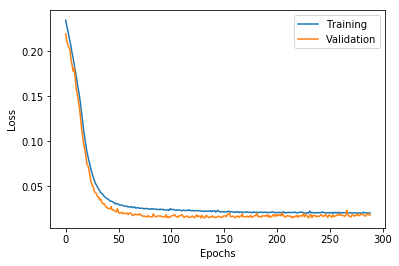

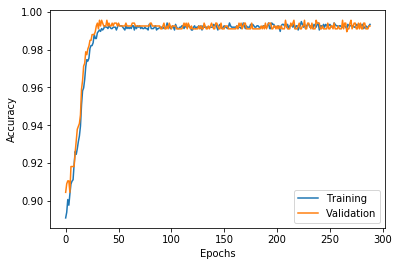

In [35]:
import matplotlib.pyplot as plt


plot_history(result,10)
 
#plt.show()


<font size = 4>
Из анализа графика видно, что мы переобучили модель, так как на валидационном наборе данных точность несколько ниже, чтобы этого избижать можно использовать метод ранней остановки (``early_stop``)

In [43]:
model = model_init(X_train)
model.compile(loss='binary_crossentropy', optimizer=adam(lr=LR), metrics=['accuracy'])
print('compiled')


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, verbose=1)
   
result = model.fit(X_train, 
          Y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE,
          verbose=1,
          validation_data = (X_test, Y_test),  
          callbacks=[early_stop])

compiled
Train on 1340 samples, validate on 660 samples
Epoch 1/300
1340/1340 [==============================] - 1s 706us/step - loss: 0.5371 - acc: 0.8299 - val_loss: 0.4503 - val_acc: 0.8818
Epoch 2/300
1340/1340 [==============================] - 0s 210us/step - loss: 0.3938 - acc: 0.8612 - val_loss: 0.3390 - val_acc: 0.8818
Epoch 3/300
1340/1340 [==============================] - 0s 195us/step - loss: 0.3240 - acc: 0.8657 - val_loss: 0.2946 - val_acc: 0.8864
Epoch 4/300
1340/1340 [==============================] - 0s 372us/step - loss: 0.2972 - acc: 0.8724 - val_loss: 0.2765 - val_acc: 0.8894
Epoch 5/300
1340/1340 [==============================] - 0s 238us/step - loss: 0.2848 - acc: 0.8791 - val_loss: 0.2687 - val_acc: 0.8879
Epoch 6/300
1340/1340 [==============================] - 0s 252us/step - loss: 0.2762 - acc: 0.8784 - val_loss: 0.2570 - val_acc: 0.8939
Epoch 7/300
1340/1340 [==============================] - 0s 232us/step - loss: 0.2717 - acc: 0.8799 - val_loss: 0.2536 - v

1340/1340 [==============================] - 0s 310us/step - loss: 0.0632 - acc: 0.9828 - val_loss: 0.0545 - val_acc: 0.9864
Epoch 61/300
1340/1340 [==============================] - 0s 174us/step - loss: 0.0601 - acc: 0.9836 - val_loss: 0.0517 - val_acc: 0.9864
Epoch 62/300
1340/1340 [==============================] - 0s 183us/step - loss: 0.0579 - acc: 0.9851 - val_loss: 0.0525 - val_acc: 0.9894
Epoch 63/300
1340/1340 [==============================] - 0s 176us/step - loss: 0.0553 - acc: 0.9873 - val_loss: 0.0459 - val_acc: 0.9879
Epoch 64/300
1340/1340 [==============================] - 0s 198us/step - loss: 0.0541 - acc: 0.9851 - val_loss: 0.0447 - val_acc: 0.9894
Epoch 65/300
1340/1340 [==============================] - 0s 187us/step - loss: 0.0521 - acc: 0.9873 - val_loss: 0.0454 - val_acc: 0.9909
Epoch 66/300
1340/1340 [==============================] - 0s 183us/step - loss: 0.0504 - acc: 0.9873 - val_loss: 0.0406 - val_acc: 0.9894
Epoch 67/300
1340/1340 [=======================

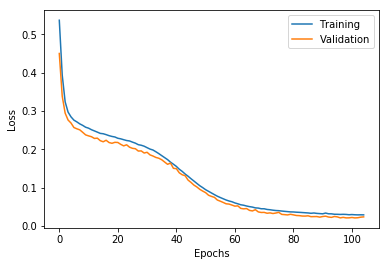

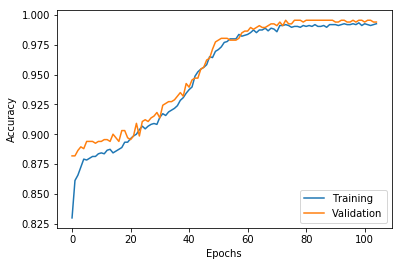

In [44]:
import matplotlib.pyplot as plt
plot_history(result,0)

In [46]:
# evaluate the model
scores = model.evaluate(X_test,Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

660/660 [==============================] - 0s 35us/step

acc: 99.39%


<font size=4 color = brown> Как видите  надо было всего лишь 100 эпох, а не 300

данный код позволяет сохранить модель

In [7]:
model_path = r'seq_model.hdf5'
model.save(model_path)

NameError: name 'model' is not defined

## 2.3 Предсказание при помощи модели

теперь можно загрузить модель обратно и использовать ее для предсказаия класса

In [50]:
from keras.models import load_model

In [51]:
model = load_model(model_path)

In [52]:

predicted = np.squeeze(np.round(model.predict(X_test))).astype(int)
                                                 
print(predicted[:40])

print(Y_test[:40])

[1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1
 1 0 0]
[1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1
 1 0 0]


## 2.4 Упражнения

<font size=3>
    
1. Исследовать модель, изменяя параметры и добавляя слои и их регуляризацию и инициализацию слоев, например дроп-ауту, батч-нормализацию или L2 регуляризацию



In [20]:
#

**! вы можете добавлять реугляризацию при помощи следующих процедур** 

**1.** Дропауты
 
```python
keras.layers.Dropout(rate, noise_shape=None, seed=None)
```
**2.** Батч-нормализация
```python
keras.layers.BatchNormalization()
```

**3.** L регуляризация (регуляризация в классическом смысле) 
```python
keras.regularizers.l1(0.)
keras.regularizers.l2(0.)
keras.regularizers.l1_l2(l1=0.01, l2=0.01)
```
регуляризация указывается послойно
 ```python
Dense(..., 
      kernel_regularizer=keras.regularizers.l1(0.) )
```
**4.** Инициализация весов
```python
keras.initializers.he_normal()
keras.initializers.he_uniform()
keras.initializers.glorot_uniform() # it is the same as Xavier 
keras.initializers.glorot_normal() # it is the same as Xavier 
keras.initializers.Zeros()
and e.t.c
```
инициализация указывается послойно
 ```python
Dense(..., 
      kernel_initializer=keras.initializers.he_normal()
      bias_initializer = keras.initializers.Zeros  )
```



**!** 
Также вы можете использовать свои варианты, при помощи следующего кода
```python
from keras import backend as K

def my_init(shape, dtype=None):
    return K.random_normal(shape, dtype=dtype)

model.add(Dense(64, kernel_initializer=my_init))
```


Для более полной информации смотрите оффициальную справку по Keras

In [19]:
#

- - -
# 3. Исследование автоэнкодера в Keras 
- - - 

[Go to content](#Table-of-content)

## 3.1 Принцип работы Автоэнкодреа

Исследоваия по данному вопросу можно найти [тут на Github](https://github.com/ramhiser/Keras-Tutorials) и [официальный пример от Keras](https://blog.keras.io/building-autoencoders-in-keras.html)

<font size =3 face ='Calibri' >

Авто-энкодер это специальный вид сетей для обучения без учителя, при этом главная цель таких сетей - это научится повторять вход на выход нетривиально, то есть так, чтобы скрытый слой не повторял входной. 

Авто-энкодеры получили широкое распространения для предобучения сетей, а также для таких целей, как, например, фильртация шума или сжатие данных (скрытм слоем, потом разкодировка в выходной слой)

![autoencoder.jpg](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1522830223/AutoEncoder_kfqad1.png)

теперь рассмотрим пример. 

In [27]:
import keras

from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model, Sequential

from keras.datasets import mnist
import numpy as np

In [28]:
# Loads the training and test data sets (ignoring class labels)
(x_train, _), (x_test, _) = mnist.load_data()

# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())

x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [29]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

(x_train.shape, x_test.shape)

((60000, 784), (10000, 784))

In [30]:
def vanila_AE(X, encoding_dim=32):
    
    input_dim = X.shape[1] # input dimension = 784   

    autoencoder = Sequential()
    autoencoder.add(Dense(encoding_dim, 
                          input_shape=(input_dim,), 
                          activation='relu'))
    
    autoencoder.add(Dense(input_dim, 
                          input_shape=(encoding_dim,),
                          activation='sigmoid'))
    
    ompression_factor = float(input_dim) / encoding_dim
    return autoencoder,  compression_factor
    


In [31]:
autoencoder, cf = vanila_AE(x_train, encoding_dim=32)
print("Compression factor: %s" % cf)
autoencoder.summary()


Compression factor: 24.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


<font size = 4>
теперь у нас автоэенкодер как на картинке ниже

![Vanila-Auto_encoder.png](https://www.researchgate.net/profile/Guillaume-Alexandre_Bilodeau/publication/327434418/figure/fig2/AS:667345727025158@1536119028351/Diagram-showing-a-Vanilla-Autoencoder.png)

<font size =3>

Теперь можно отдельно создать кодирующую чать


In [8]:
def get_encoder(X, autoencoder ):
    
    input_dim = X.shape[1] # input dimension = 784  
    
    input_img = Input(shape=(input_dim,))

    encoder_layer = autoencoder.layers[0]

    encoder = Model(input_img, encoder_layer(input_img))

    return encoder

In [9]:
encoder = get_encoder(x_train, autoencoder )
print(encoder.summary())

NameError: name 'x_train' is not defined

<font size =4>

кодер имеет структуру как на картинке
![encoder-RBM](https://skymind.ai/images/wiki/two_layer_RBM.png)

## 3.2 Обучение авоэнкодера

In [10]:
from keras.optimizers import adam 

In [47]:
LR=1e-3
EPOCHS = 5
BATCH = 100

In [48]:
autoencoder,_ = vanila_AE(x_train, encoding_dim=32)

autoencoder.compile(loss='binary_crossentropy', 
              optimizer=adam(lr=LR))


autoencoder.fit(x_train, 
                x_train,
                epochs      = EPOCHS,
                batch_size  = BATCH,
                shuffle     = True,
                verbose     = True,
                validation_data = (x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 192us/step - loss: 0.2144 - val_loss: 0.1494
Epoch 2/5
60000/60000 [==============================] - 12s 194us/step - loss: 0.1333 - val_loss: 0.1185
Epoch 3/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.1124 - val_loss: 0.1049
Epoch 4/5
60000/60000 [==============================] - 12s 198us/step - loss: 0.1026 - val_loss: 0.0982
Epoch 5/5
60000/60000 [==============================] - 12s 200us/step - loss: 0.0978 - val_loss: 0.0951


выделение кодера для того, чтобы посмотреть как он кодирует

In [3]:
encoder = get_encoder(x_test, autoencoder )

NameError: name 'get_encoder' is not defined

предсказание

In [50]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

<font size = 4 face = 'Arial' >
    
**тест результатов на случайных изображениях**

In [53]:
n_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=n_images)

визуализация результатов

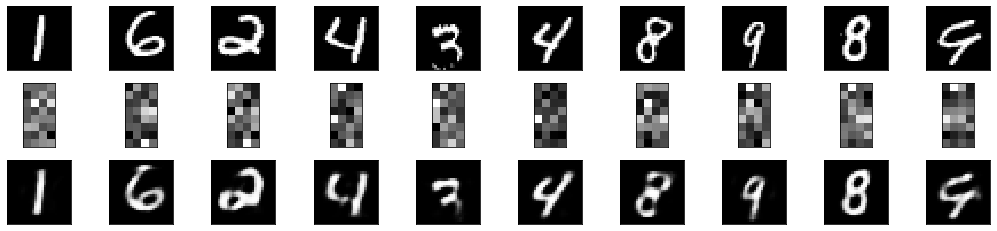

In [51]:
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 3.3 Упражнения

<font size=4  face = 'Calibri' style='Line-height : 1.5em'>  
    
**1.** преорбазовать модель в  <font size = 5> **deep autoencoder** </font> (добавить слои регуляризацию и тп), посмотреть как это скажится на результатах

In [15]:
#

<font size=4  face = 'Calibri' style='Line-height : 1.5em'>  
    
**2.** создать сверточный автоэнкодер  (<font size = 5> **convolution autoencoder** </font> ) (заменить полносвязные слои на сверточные) и посмотреть как это скажется на результате

In [16]:
#

<font size =4 face = 'Calibry' style='Line-height:1.5em'>

    
**для создания сверточных слоев можно использовать следующие процедуры** 
**1.** for encoder use the follow layers:

**Convolution 2D layer**
```python 
    keras.layers.Conv2D(
            filters, 
            kernel_size, 
            activation, 
             padding)
``` 
**Maxpooling 2D layer**

```python 
    keras.layers.MaxPooling2D(
                    pool_size, 
                    strides,
                    padding)
```

**Upsampling 2D layer**

```python 
    keras.layers.UpSampling2D(
                    pool_size, 
                    interpolation)
```

<font size=4 face = 'Calibri' style='Line-height : 1.5em'>  

**3.** Cоздать фильтрующий автоэнкодер <font size =5 >**de-noise autoencoder** </font> (при этом надо добавить доп. слой добавления шумов в модель,
 скрытый слой дложен быть шире входного) и исследовать свойства такой модели


In [17]:
#

## В качестве примера привожу готовую реализацию сверточной сети:
- - -
>> 

```python 
def CNN_init(inputShape, n_classes, hyperparams):
     '''
        Функция создания модели сверточной нейронной сети для обучения 

        Входные аргументы:
            inputShape  - размер входной выборки,
                размер должен быть (AxAx1), 
                где A – размер изображения.

            n_classes   – число классов 

            hyperparams – словарь гиперпараметров
                hyperparams = \
                    {'DROPOUT':0.008,# % дропаута
                     'L2RATE':0.002, # коэффициент регуляризации
                     'IMAGE_SIZE’:28,# сторона квадратного изображения
                     'SIZE_LAYER_COF': 4 # размер входного слоя 4*imSize
                      }
        Выход:
            model – модель сверточной сети
    '''   
    dropout_rate = hyperparams['DROPOUT']
    l2rate       = hyperparams['L2RATE']
    imSize       = hyperparams['IMAGE_SIZE']
    size_layer   = hyperparams['SIZE_LAYER_COF']*imSize

    model = Sequential()   

    if(len(np.asarray(inputShape.shape)  )<3:
        inputShape = (imSize, imSize,1)
       
    # 1
    model.add(Conv2D(size_layer, 
                     kernel_size = 3, 
                     strides     = 1, 
                     activation  = 'linear',
                     kernel_regularizer = keras.regularizers.l2(l2rate),
                     input_shape = inputShape ))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size = (2, 2),strides = 2))
    
    # 2
    model.add(Dropout(dropout_rate))    
    model.add(Conv2D(size_layer, 
                     kernel_size = 3,
                     strides     = 1, 
                     kernel_regularizer=keras.regularizers.l2(l2rate),
                     activation  = 'linear'))   
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size = (2, 2),strides = 2))
       
    # 3
    model.add(Dropout(dropout_rate))
    model.add(Conv2D(size_layer//2, 
                     kernel_size = 3,
                     strides     = 1, 
                     kernel_regularizer = keras.regularizers.l2(l2rate),
                     activation  = 'linear'))   
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size = (2, 2),strides = 2))
    
    #4
    model.add(Flatten())
    
    #5
    model.add(Dense(size_layer//2, activation = 'linear'))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(Dropout(dropout_rate))
    
    #6
    model.add(Dense(size_layer         = n_classes, 
                    activation         = 'softmax',
                    kernel_regularizer = keras.regularizers.l2(l2rate),
                    kernel_initializer = keras.initializers.glorot_uniform(),
                    bias_initializer   = keras.initializers.Zeros())) 
    
    return model  

#---------------------------------------------
hyperparams = \
    {'DROPOUT':0.008,# % дропаута
     'L2RATE':0.002, # коэффициент регуляризации
     'IMAGE_SIZE':28,# сторона квадратного изображения
     'SIZE_LAYER_COF': 4 # размер входного слоя 4*imSize
    }    
CNN = CNN_init(inputShape = (28,28,1), n_classes=10, hyperparams)     
CNN.compile(loss      = 'sparse_categorical_crossentropy', 
            optimizer = adam(lr = LR), 
            metrics   = ['accuracy'])
CNNm.summary()
             
```   
- - - 
>>


- - -
# 4. Генеративно-состязательные сети (Generative Adversarial Network, GAN)
- - -


[Go to content](#Table-of-content)

 Генеративно-состязательные сети (Generative Adversarial Network, GAN)
## 4.1 Основы работы GAN

<font size=4  face = 'Calibri' style='Line-height : 1.5em'>  

GAN - генеративно-состязательная сеть - это специальный вид сетей, для генерации данных из шума (напр. белого или равномерного):

1. Основная цель сети при обучении- подобрать веса так, чтобы шум приобрел форму заданных данных, то есть создать соответствующий данным фильтр.  

    
2. сеть использует 2 под-сети: дискриминатор и генератор, цель первой - научится классифицировать где реальные данные, а где шум, цель второй - научится обманывать дикриминатор. 

 

<font size=4 face='Calibri' color = black|brown>
принцип работы показан ниже

![GAN-basic](https://camo.githubusercontent.com/912e1ea2c0ed056db1fd96cf45752decb74e6844/68747470733a2f2f646f63732e676f6f676c652e636f6d2f75633f69643d30427934517678416b41694e4363476c345645524d4f55644e543055)

<font size=4 face='Calibri' color = black style='Line-height:1.5em'>

см. также следующие исследования [это](https://github.com/T-Almeida/GAN-study/blob/master/01-%20GAN-2014-IanGoodfellow%20(GAN)%20-%20Keras%20implementation.ipynb) (и в дополнение 
[тут](https://github.com/erschmidt/Jupyter-GAN), 
[тут](https://github.com/tjwei/GANotebooks), 
[тут](https://github.com/T-Almeida/GAN-study),
[тут](https://github.com/eriklindernoren/Keras-GAN)
и широкое исследование
[тут](https://github.com/wiseodd/generative-models ))

<font size=4 face='Calibri' color = black style='Line-height:1.5em'>
    
импорт

In [1]:
from numpy.random import seed
seed(42)

from tensorflow import set_random_seed
set_random_seed(42)

##imports
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import tensorflow.keras.backend as K


In [2]:
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import Dense,Activation,LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam

from functools import reduce

In [3]:
#reset graph using during notebook development
K.clear_session()

<font size=4 face='Calibri' color = black style='Line-height:1.5em'>
    
набор данных

In [4]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
print(x_train.shape)

(60000, 28, 28)


In [6]:
IMAGE_SIZE     = x_train.shape[1:]
IMAGE_1D_SIZE  = reduce(lambda a,b:a*b,  x_train.shape[1:])

print(IMAGE_SIZE)
print(IMAGE_1D_SIZE)

(28, 28)
784


In [7]:
x_train = x_train.reshape([-1,IMAGE_1D_SIZE]).astype('float32')
x_test  = x_test.reshape([-1,IMAGE_1D_SIZE]).astype('float32')

In [8]:
#rescale the image to [0-1] range
x_train = x_train/ 255
x_test  = x_test/ 255

print("Shape of the training images",x_train.shape)

Shape of the training images (60000, 784)


<font size=4 face='Calibri' color = black style='Line-height:1.5em'>
    
визуализация

In [9]:
def plot_mnist_images(data, img_shape = IMAGE_SIZE):
    
    imgs = data.reshape(-1,img_shape[0],img_shape[1])   
    
    edge_of_imgs = int(np.sqrt(data.shape[0]))
    
    n_of_imgs = (edge_of_imgs)**2

    fig = plt.figure(figsize=(4, 4)) # create fugure 

    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    plt.cla()
    
    for i in range(n_of_imgs):

        ax = fig.add_subplot(edge_of_imgs, edge_of_imgs, i + 1, xticks=[], yticks=[])

        ax.imshow(imgs[i,:], cmap='binary')
    
    # Show the plot
    plt.show()

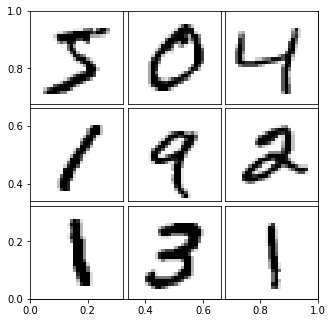

In [10]:
plot_mnist_images(x_train[:9], (28,28))

## 4.2 Создание ГАН (генератора и дискреминатора) 

<font size=4 face='Calibri' style='Line-height:1.5em'>

будем использовать шум размерности 100

In [12]:
#Dimention of random vector using for sampling
Z_SHAPE = 100

генератор

In [14]:
#unput layer
g_input = Input(shape=[Z_SHAPE], name="g_input")

#hidden layer
H = Dense(128)(g_input)
H = Activation('relu')(H)

#output layer
g_output = Dense(IMAGE_1D_SIZE)(H)
g_output = Activation('sigmoid')(g_output)

#compil midel
generator = Model(g_input,g_output, name="generator")

# see what obtained
generator.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
g_input (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               101136    
_________________________________________________________________
activation_1 (Activation)    (None, 784)               0         
Total params: 114,064
Trainable params: 114,064
Non-trainable params: 0
_________________________________________________________________


<font size=4  face = 'Calibri' style='Line-height : 1.5em'>  
    
дискриминатор - классифицирующая сеть 

In [15]:
#input layer
d_input = Input(shape=[IMAGE_1D_SIZE],  name="d_input")

#hidden layer
H = Dense(128)(d_input)
H = Activation('relu')(H)

#output layer
d_output = Dense(1)(H)
d_output = Activation('sigmoid')(d_output)

# create model
discriminator = Model(d_input,d_output, name="discriminator")

#compil midel
d_optimizer = Adam(lr=0.001)
discriminator.compile(loss='binary_crossentropy', optimizer=d_optimizer)

# see what obtained
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d_input (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


<font size=4  face = 'Calibri' style='Line-height : 1.5em'> 

функция, чтобы сделать слои нетренируемыми 




<font size=4  face = 'Calibri' style='Line-height : 1.5em'> 

**NOTE**
мы будем использовать дискриминатор с фиксированными параметрами при обучении генератора

<font size=4  face = 'Calibri' style='Line-height : 1.3em' color=red> 

в силу некоторых технических недочетов keras имено тут надо замораживать слои

In [16]:
def make_trainable(net, val=True):
    net.trainable = val
    for l in net.layers:
        l.trainable = val

# Freeze weights in the discriminator for adversarial training
make_trainable(discriminator, False)


<font size=4  face = 'Calibri' style='Line-height : 1.5em'> 

сам ГАН

In [17]:
# Build stacked GAN model to train the generator
gan_input = Input(shape=[Z_SHAPE], name="gan_z_input")
gan_fake_samples = generator(gan_input)
gan_output = discriminator(gan_fake_samples)

#create model 
gan = Model(gan_input, gan_output, name="generator_adversarial")

#compile model 
gan_optimizer = Adam(lr=0.001)
gan.compile(loss='binary_crossentropy', optimizer=gan_optimizer)

# see the model
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gan_z_input (InputLayer)     (None, 100)               0         
_________________________________________________________________
generator (Model)            (None, 784)               114064    
_________________________________________________________________
discriminator (Model)        (None, 1)                 100609    
Total params: 214,673
Trainable params: 114,064
Non-trainable params: 100,609
_________________________________________________________________


## 4.3 Тренировка GAN

<font size=4  face = 'Calibri' style='Line-height : 1.5em'>  
    
 процедура тренировки состоит из 2 
 этапов
 </font>
 
 
1 этап - генерация изображений генератором 
и присвоение им класса 0 и выборка реальных изображений с классом 1 и обучение дискриминатора на сформированном наборе данных.


2 этап - обучение генератора с фиксированным дискриминатором генерировать данные из шума.



<font size =5 face = 'Calibri' >    
    
функция, для создания шума на входе генератора

In [19]:
def random_Z(m, n=Z_SHAPE):
    return np.random.uniform(-1., 1., size=[m, n])    

<font size =5 face = 'Calibri' >
    
вспомогательные процедуры

In [20]:
#save losses 
losses = {}
losses["gan_loss"] = []
losses["d_loss"]   = []

<font size =5 face = 'Calibri' >
    
    
**тренеровка** 

Discriminator loss:  0.29918635
Generator loss: 3.747555


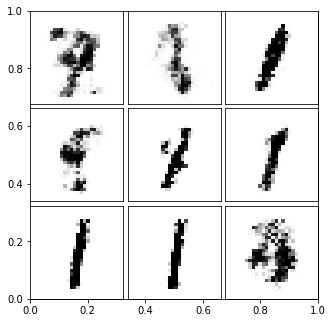

Discriminator loss:  0.34445345
Generator loss: 3.0470865


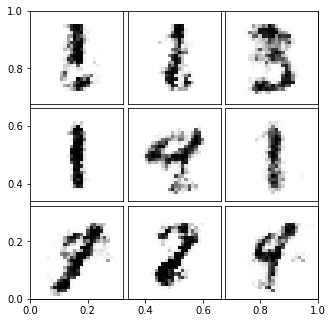

Discriminator loss:  0.35156074
Generator loss: 2.7249665


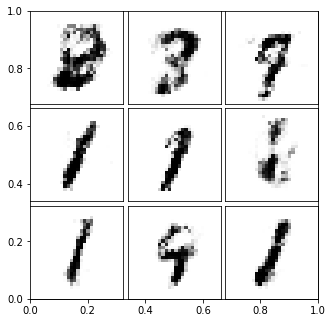

Discriminator loss:  0.43849242
Generator loss: 2.3149114


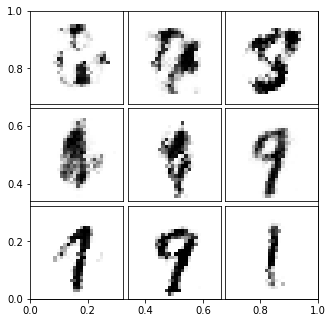

Discriminator loss:  0.29594195
Generator loss: 2.8674092


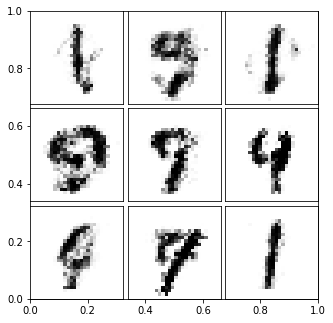

Discriminator loss:  0.38314658
Generator loss: 2.408444


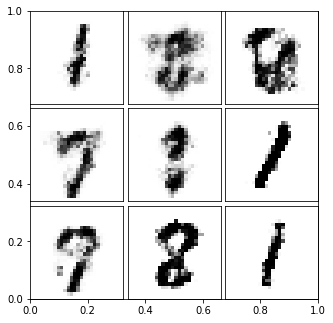

Discriminator loss:  0.2883997
Generator loss: 2.7571168


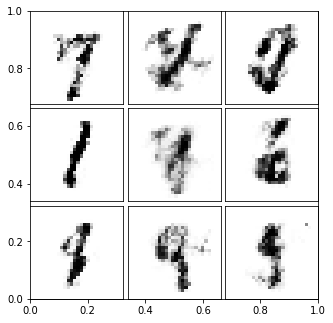

Discriminator loss:  0.39752102
Generator loss: 1.7469094


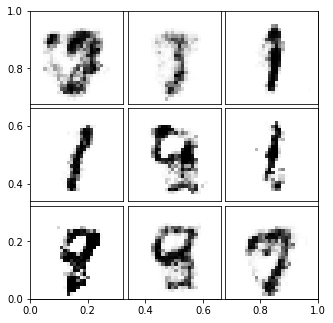

Discriminator loss:  0.41310924
Generator loss: 2.1446662


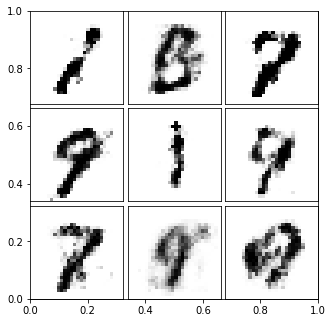

Discriminator loss:  0.31860298
Generator loss: 2.1491573


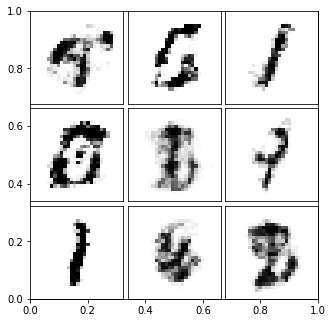

Discriminator loss:  0.3985697
Generator loss: 1.8961341


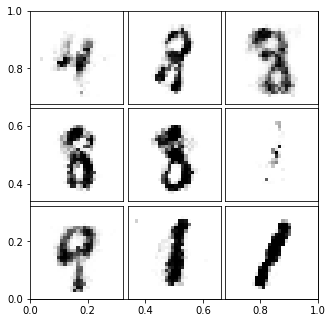

Discriminator loss:  0.34212732
Generator loss: 2.3782015


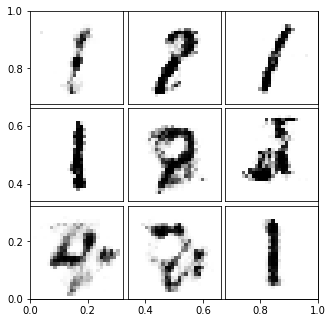

Discriminator loss:  0.31089497
Generator loss: 2.4200706


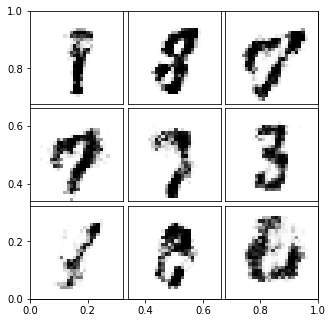

Discriminator loss:  0.35902715
Generator loss: 2.4125984


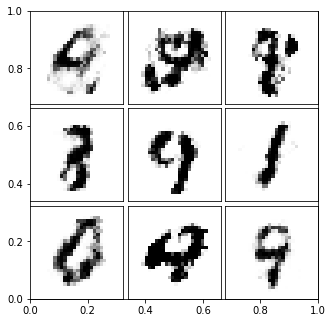

Discriminator loss:  0.39257678
Generator loss: 1.9832001


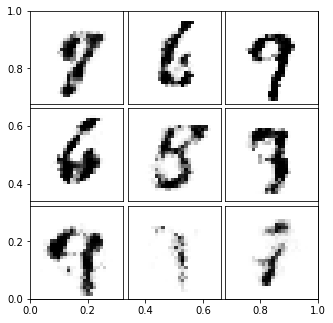

Discriminator loss:  0.37778705
Generator loss: 2.2485747


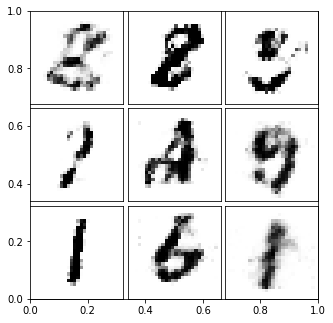

Discriminator loss:  0.43833795
Generator loss: 1.9376869


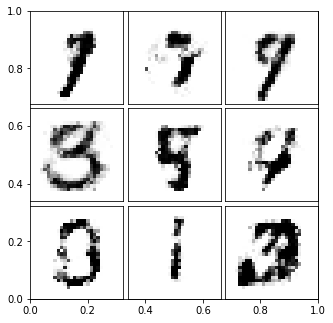

Discriminator loss:  0.39354604
Generator loss: 2.1546361


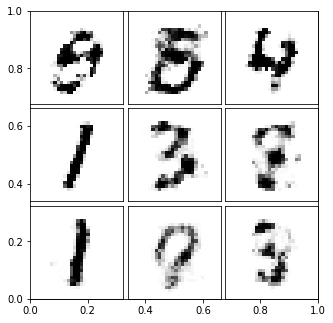

Discriminator loss:  0.36735097
Generator loss: 2.1618223


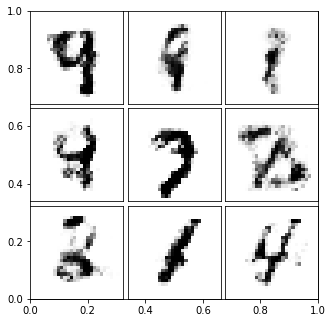

Discriminator loss:  0.35748142
Generator loss: 1.9400382


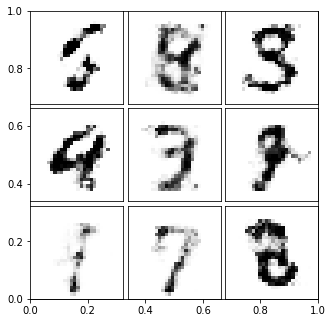

In [22]:
batch_size = 256 #must be multiple of 2
epochs     = 20000


#save losses 
losses = {}
losses["gan_loss"] = []
losses["d_loss"] = []

for i in range(epochs):
    
    #generate images
    synthetic_images = generator.predict_on_batch(random_Z(batch_size))
    
    #select from tranning set
    real_images = x_train[np.random.randint(0,x_train.shape[0],size=batch_size),:]
    
    d_x = np.concatenate((synthetic_images, real_images))
    d_y = np.zeros([2*batch_size,1])
    
    d_y[batch_size:] = 1 #second half of the batch are true images so have label 1 and fake (first half) have label 0
        
    #first discriminator
    make_trainable(discriminator,True)
    d_loss = discriminator.train_on_batch(d_x,d_y)
    
    #second generator in adversarail faction
    gan_x = random_Z(2*batch_size)
    gan_y = np.ones([2*batch_size,1])

    make_trainable(discriminator,False)
    gan_loss = gan.train_on_batch(gan_x,gan_y)
    
    losses["gan_loss"] += [gan_loss]
    losses["d_loss"]   += [d_loss]

    
    if i%(epochs/20) == 0:
        print("Epoch: ",i)
        print("Discriminator loss: ",d_loss)
        print("Generator loss:",gan_loss)
        
        #sample 9 images from generator
        generated_images = generator.predict_on_batch(random_Z(9))
        plot_mnist_images(generated_images)


<font size =5 face = 'Calibri' >
    
сохранение модели


In [23]:
#Save models
gan.save('gan.hdf5')
discriminator.save('discriminator.h5py')

<font size =5 face = 'Calibri' >
    
Кривая обучения

Discriminator loss:  0.479488
Generator loss: 2.0033152

 Plot learning curves 



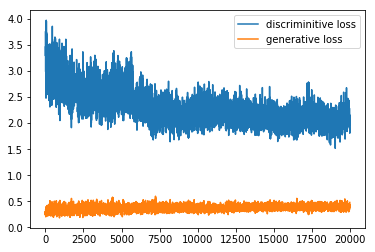

In [24]:
print("Discriminator loss: ",d_loss)
print("Generator loss:",gan_loss)

print("\n Plot learning curves \n")

plt.plot(losses["gan_loss"], label='discriminitive loss')
plt.plot(losses["d_loss"], label='generative loss')
plt.legend()
plt.show()

<font size =5 face = 'Calibri' >

**резуьлтат обучения**

создадим 9 изображений из шума (`random_Z(9)`)

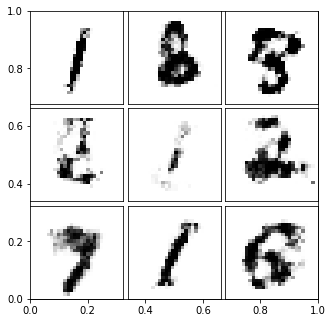

In [25]:
generated_images = generator.predict_on_batch(random_Z(9))
plot_mnist_images(generated_images)

## 4.4 Упражнения

<font size =4 face = 'Calibri' >
    
**1.**  исследовать ГАН в зависимости от параметров модели и числа слоев

In [18]:
#


</font> <font size =4 face = 'Calibri' style='Line-heght:1.5em'>
    
**2.** преорбазовать модель в сверточный ГАН

In [ ]:
#